## PD5
#### Artur Żółkowski

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa5/clustering.csv", header = None, names = ["x", "y"])

In [3]:
df.head()

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


In [4]:
df.describe()

,x,y
count,400.000000,400.000000
mean,-0.580656,-8.010264
std,48.821210,62.096845
min,-107.433649,-128.983720
25%,-34.551495,-70.730416
50%,5.691010,-3.447565
75%,31.456507,45.822610
max,109.733409,99.935839


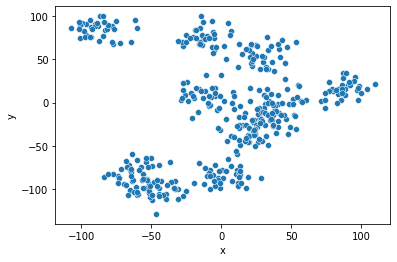

In [7]:
sns.scatterplot(x='x', y='y', data=df)
plt.show()

### K-means

#### Metoda łokcia

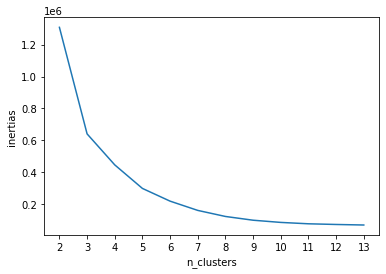

In [14]:
inertias  = []
n_clusters = range(2, 14)

for i in n_clusters:
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df)
    inertias.append(kmeans.inertia_)
    
    
elbow_plot = pd.DataFrame({'n_clusters': n_clusters, 'inertias': inertias})


sns.lineplot(x='n_clusters', y='inertias', data=elbow_plot)
plt.xticks(n_clusters)
plt.show()

Można zauważyć przegięcia dla 3 i 5, choć ciężko jednoznacznie wskazać łokieć.

#### Silhouette score

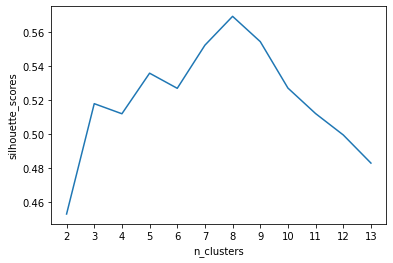

In [18]:
silhouette_scores  = []
n_clusters = range(2, 14)

for i in n_clusters:
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))
    
    
silhouette_plot = pd.DataFrame({'n_clusters': n_clusters, 'silhouette_scores': silhouette_scores})


sns.lineplot(x='n_clusters', y='silhouette_scores', data=silhouette_plot)
plt.xticks(n_clusters)
plt.show()

Silhouette score wyraźnie wskazuje na 8 jako optymalną liczbę klastrów.

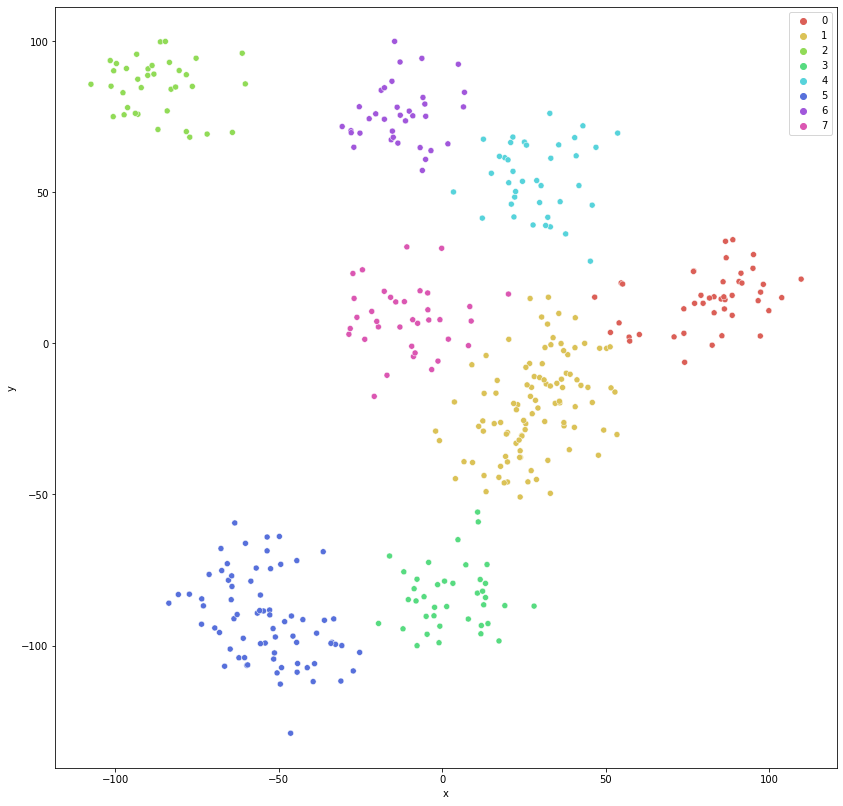

In [22]:
labels = KMeans(n_clusters=8).fit_predict(df)

plt.figure(figsize=(14, 14))
sns.scatterplot(x="x", y="y", data = df, hue=labels, palette=sns.color_palette("hls", 8))
plt.show()

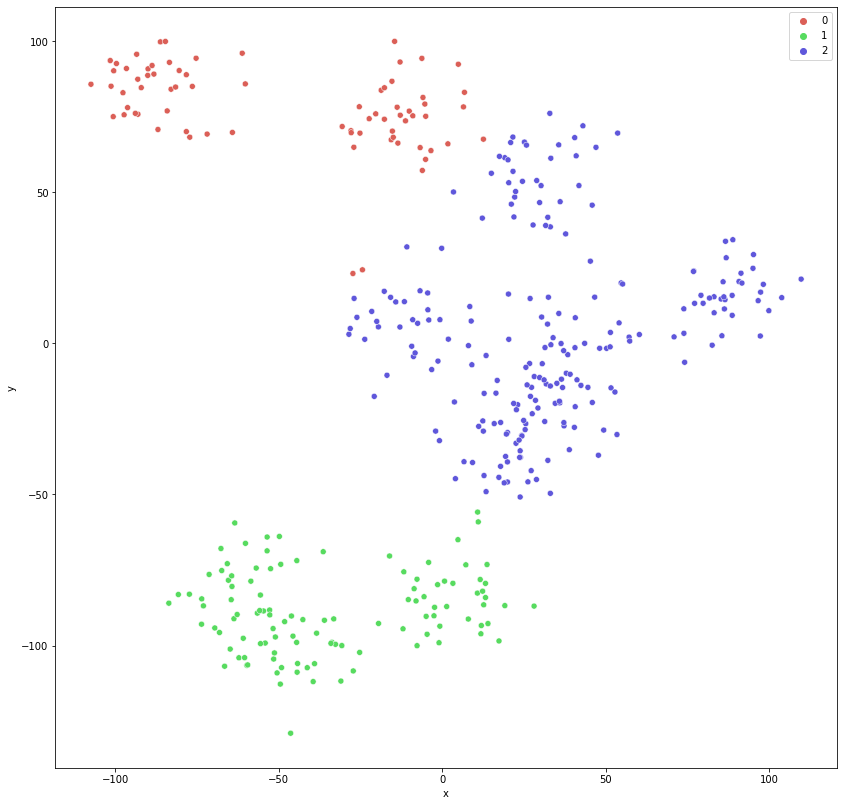

In [23]:
labels = KMeans(n_clusters=3).fit_predict(df)

plt.figure(figsize=(14, 14))
sns.scatterplot(x="x", y="y", data = df, hue=labels, palette=sns.color_palette("hls", 3))
plt.show()

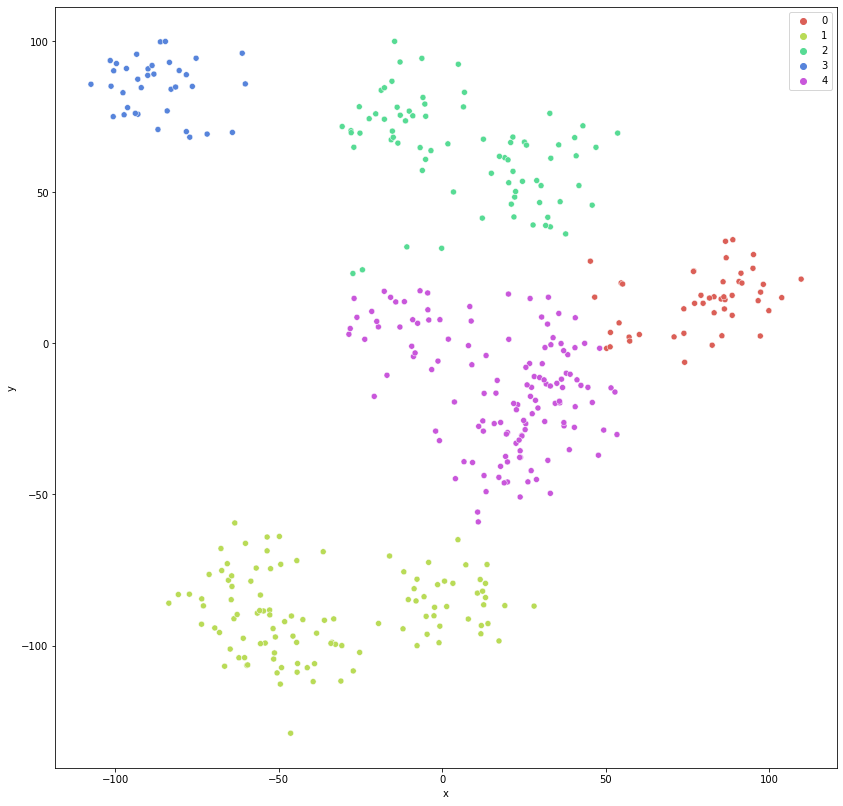

In [25]:
labels = KMeans(n_clusters=5).fit_predict(df)

plt.figure(figsize=(14, 14))
sns.scatterplot(x="x", y="y", data = df, hue=labels, palette=sns.color_palette("hls", 5))
plt.show()

Tak jak wskazał silhouette score, 8 wydaje się być rozsądną liczbą klastrów.

### Hierarchical clustering

#### dendrogram

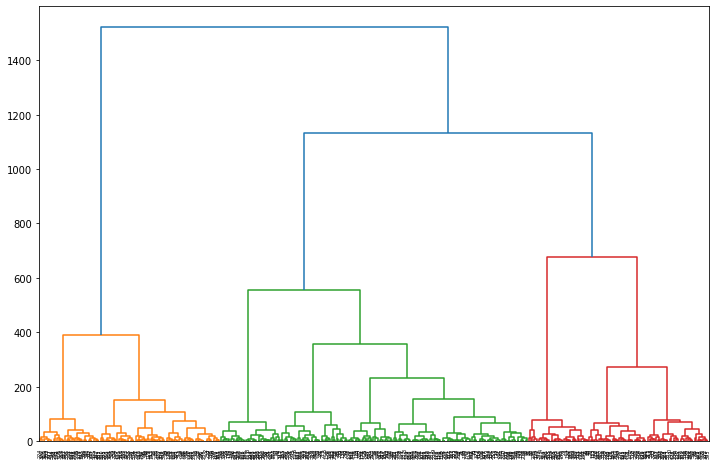

In [27]:
distances_matrix = linkage(df, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(distances_matrix)
plt.show()

#### davies bouldin

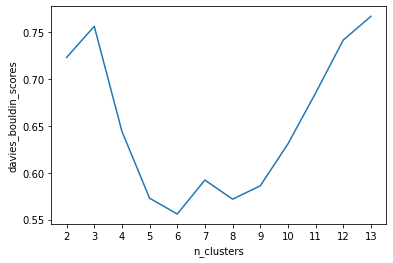

In [29]:
davies_bouldin_scores = []
for i in n_clusters:
    labels = fcluster(distances_matrix, i, criterion = "maxclust")
    davies_bouldin_scores.append(davies_bouldin_score(df, labels))
    
davies_bouldin_plot = pd.DataFrame({'n_clusters': n_clusters, 'davies_bouldin_scores': davies_bouldin_scores})


sns.lineplot(x='n_clusters', y='davies_bouldin_scores', data=davies_bouldin_plot)
plt.xticks(n_clusters)
plt.show()

Najlepsza liczba klastró - 6, choć cały przedział 5-9 wypada dobrze

#### calinski harabasz

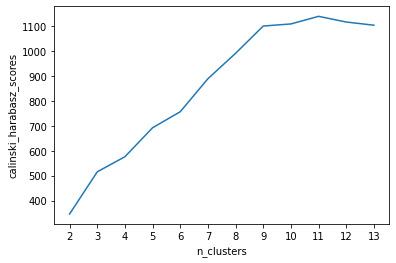

In [30]:
calinski_harabasz_scores = []
for i in n_clusters:
    labels = fcluster(distances_matrix, i, criterion = "maxclust")
    calinski_harabasz_scores.append(calinski_harabasz_score(df, labels))
    
calinski_harabasz_plot = pd.DataFrame({'n_clusters': n_clusters, 'calinski_harabasz_scores': calinski_harabasz_scores})


sns.lineplot(x='n_clusters', y='calinski_harabasz_scores', data=calinski_harabasz_plot)
plt.xticks(n_clusters)
plt.show()

Zauważalne odcięcie dla 9

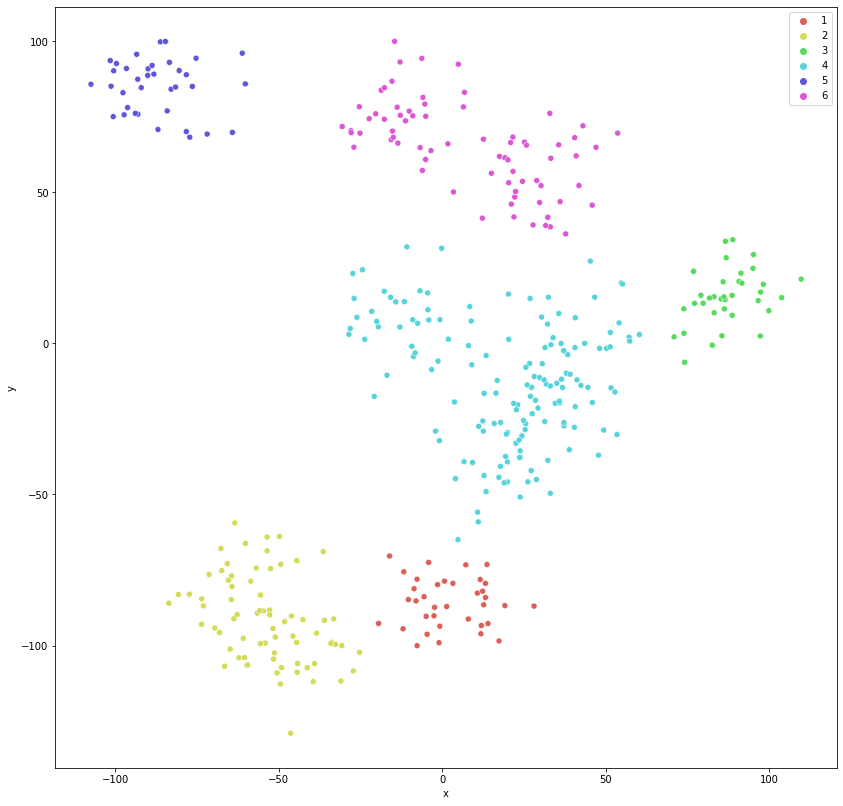

In [33]:
labels = fcluster(distances_matrix, 6, criterion = "maxclust")

plt.figure(figsize=(14, 14))
sns.scatterplot(x="x", y="y", data = df, hue=labels, palette=sns.color_palette("hls", 6))
plt.show()